In [155]:
import pandas as pd


In [114]:
import geopandas as gpd


codes = pd.read_csv("/home/marc/projects/ICML19_TSW/images/codes.csv", delimiter=";",encoding="utf-8")

regions = dict(
    frh01=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH01.shp"),
    frh02=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH02.shp"),
    frh03=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH03.shp"),
    frh04=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH04.shp")
)

annotated_shape_file_folder = "/data/france/BreizhCrops/shp/annotated"


In [143]:

english_group_names = ['common wheat','corn grain and silage','barley','other cereals',
       "rapeseed", "sunflower", "other oilseeds", "protein crops",
       'fibre plants','gel (frozen surfaces without production)','rice',
       'pulses','fodder','estives and heaths',
       "permanent meadows", "temporary meadows", "orchards",
       "vines", "nuts", "olive trees",
       'other industrial crops','vegetables or flowers',
       "sugar cane", "miscellaneous"]

french_group_names = ['Blé tendre', 'Maïs grain et ensilage', 'Orge', 'Autres céréales',
       'Colza', 'Tournesol', 'Autres oléagineux', 'Protéagineux',
       'Plantes à fibres', 'Gel (surfaces gelées sans production)', 'Riz',
       'Légumineuses à grains', 'Fourrage', 'Estives et landes',
       'Prairies permanentes', 'Prairies temporaires', 'Vergers',
       'Vignes', 'Fruits à coque', 'Oliviers',
       'Autres cultures industrielles', 'Légumes ou fleurs',
       'Canne à sucre', 'Divers']

mapping = pd.DataFrame([english_group_names,french_group_names],index=["group_name","french_group_names"]).T

codes = pd.merge(codes,mapping,left_on = "Libellé Groupe Culture",right_on = "french_group_names")

add groups and group names to the shapefiles

In [157]:
for name, data in regions.items():
    regions[name] = pd.merge(data,codes,left_on = "CODE_CULTU",right_on = "Code Culture")

store annotated shapefiles

In [ ]:
for name, data in regions.items():
    path = annotated_shape_file_folder + "/" + name + ".shp"
    print("saving "+path)
    regions[name].to_file(path, driver='ESRI Shapefile', encoding="utf-8")

count number of instances per group

In [149]:
counts = list()
for name, data in regions.items():
    count = data.groupby("group_name").count()["ID"]
    count.name=name
    counts.append(count)
counts = gpd.GeoDataFrame(counts).fillna(0).astype(int).T

take only crop types that appear at least 200 times in each region and 1000 times in all regions

In [152]:
minimum_instances_per_region = 250
minimum_instances_total = 1000

counts = counts.loc[(counts >= minimum_instances_per_region).all(1) & (counts.sum(1) >= minimum_instances_total)]

In [160]:
#counts.reset_index().to_csv("/home/marc/projects/ICML19_TSW/images/counts.csv")
counts

,frh02,frh04,frh03,frh01
barley,10740,5981,7154,13051
common wheat,15028,17012,27206,30383
corn grain and silage,36622,31369,42015,44008
fodder,4337,4542,7641,6519
gel (frozen surfaces without production),3270,4560,2815,1522
miscellaneous,12158,15594,21217,17672
orchards,350,556,1224,947
other cereals,3663,5791,4518,6280
permanent meadows,36568,26154,32564,32664
protein crops,463,658,1079,1107


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

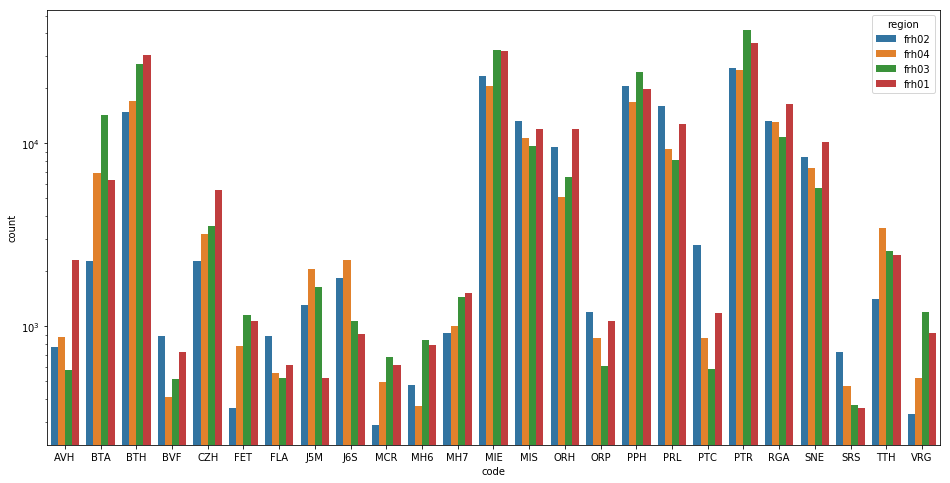

In [92]:
fig,ax = plt.subplots(1,1,figsize=(16,8))

data_=counts.stack().reset_index()
data_.columns=["code","region","count"]
ax = sns.barplot(x="code", y="count", hue="region", data=data_,ax=ax)
ax.set_yscale('log')

In [86]:
data_=counts.stack().reset_index()

In [88]:
data_.columns=["a","b","c"]

In [166]:
regions["frh04"].loc[regions["frh01"].ID==3685593]

,ID,CODE_CULTU,geometry,Code Culture_x,Libellé Culture_x,Code Groupe Culture_x,Libellé Groupe Culture_x,group_name_x,french_group_names_x,Code Culture_y,Libellé Culture_y,Code Groupe Culture_y,Libellé Groupe Culture_y,group_name_y,french_group_names_y


In [172]:
codes.loc[codes["Code Culture"]=="MIE"]

,Code Culture,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture,group_name,french_group_names
3,MIE,Maïs ensilage,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage


,Code Culture,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture,group_name,french_group_names
0,BTH,Blé tendre d'hiver,1,Blé tendre,common wheat,Blé tendre
1,BTP,Blé tendre de printemps,1,Blé tendre,common wheat,Blé tendre
2,MID,Maïs doux,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
3,MIE,Maïs ensilage,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
4,MIS,Maïs,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
5,ORH,Orge d'hiver,3,Orge,barley,Orge
6,ORP,Orge de printemps,3,Orge,barley,Orge
7,AVH,Avoine d'hiver,4,Autres céréales,other cereals,Autres céréales
8,AVP,Avoine de printemps,4,Autres céréales,other cereals,Autres céréales
9,BDH,Blé dur d'hiver,4,Autres céréales,other cereals,Autres céréales


In [178]:
!ls data/csv/FRH0 | wc -l

558814


In [179]:
import os

In [239]:
files = os.listdir("data/csv/FRH0")
Ts = list()
for f in files[:100000]:
    Ts.append(len(pd.read_csv(os.path.join("data/csv/FRH0/",f)).groupby("doa").first()))

In [240]:
import numpy as np
Ts = np.array(Ts)

In [325]:
counts, b = np.histogram(Ts, bins=Ts.max(), range=(0,Ts.max()), density=True)

Text(0.5, 0, 'number of observations per parcel')

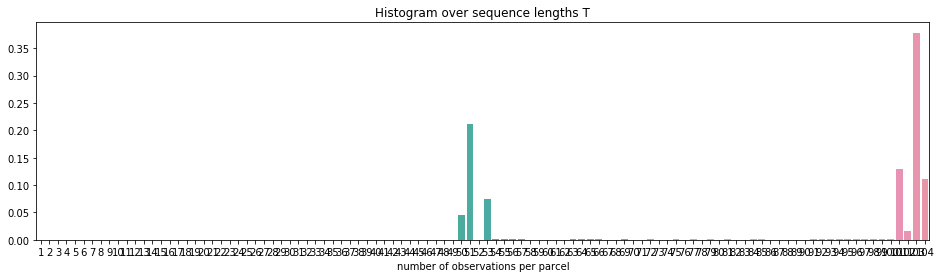

In [329]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(y=counts, x=np.arange(1,len(counts)+1), ax=ax)
ax.set_title("Histogram over sequence lengths T")
ax.set_xlabel("number of observations per parcel")

Text(0.5, 0, 'Number of days in between acquisitions')

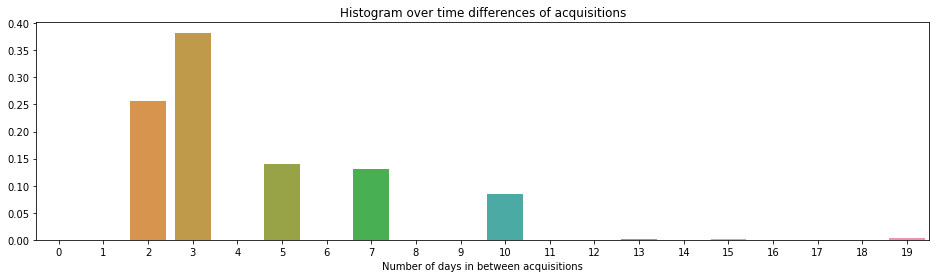

In [353]:
def load(example):
    data = pd.read_csv(example).groupby("doa").first()
    data["doa"] = pd.to_datetime(data.index)
    return data["doa"].diff().dt.days.dropna().values

delta_day = [load(os.path.join("data/csv/FRH0/",f)) for f in files[:500]]
delta_day = np.hstack(delta_day)
             
counts,_ = np.histogram(delta_day, bins=int(delta_day.max()), range=(0,int(delta_day.max())), density=True)

fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(y=counts, x=np.arange(len(counts)), ax=ax)
ax.set_title("Histogram over time differences of acquisitions")
ax.set_xlabel("Number of days in between acquisitions")

In [348]:
delta_day = [load(os.path.join("data/csv/FRH0/",f)) for f in files[:100]]

In [351]:
np.hstack(delta_day)

array([3., 7., 3., ..., 2., 3., 2.])